# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [5]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [6]:
LV_NAME = "LV803"

In [56]:
# LV_AXIS_THRESHOLD = None  # 3.0
LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [8]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [9]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [10]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [11]:
multiplier_model_summary.shape

(2157, 5)

In [12]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [13]:
# INPUT_SUBSET = "z_score_std"

In [14]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [15]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [16]:
# data = pd.read_pickle(input_filepath)

In [17]:
# data.shape

In [18]:
# data.head()

## LV data

In [19]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [20]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [21]:
lv_data = lv_obj.get_experiments_data()

SRP060416, SRP066834, SRP057196, SRP055569, SRP002881, SRP042161, SRP050499, SRP055153, SRP033135, SRP058773, SRP045659, SRP015976, SRP064464, SRP062025, SRP015336, SRP024244, SRP018838, SRP067661, SRP007461, SRP059379, SRP007338, SRP059775, SRP055810, SRP043033, SRP015853, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (24 != 25)
  warnings.warn(


In [22]:
lv_data.shape

(4810, 43)

In [23]:
lv_data.head()

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088096    Donor T74          NK  tonsil Innate lymphoid cells   
          SRR2088128    Donor T74        ILC3  tonsil Innate lymphoid cells   
          SRR2088153    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088179    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   

                     Stage tissue  age c1 chip id experiment_sample_name  \
project   run                                                              
SRP060416 SRR2088096   NaN    NaN  NaN        NaN                    NaN   
          SRR2088128   NaN    NaN  NaN        NaN                    NaN   
          SRR2088153   NaN    NaN  NaN        NaN                    NaN   
          SRR2088179   NaN    NaN  NaN        NaN                    NaN   
          SRR2088205   NaN    NaN  NaN        NaN                    NaN   

                     cell line patient id  ... cell sorted time in culture  \
project   run                              ...                               
SRP060416 SRR2088096       NaN        NaN  ...         NaN             NaN   
          SRR2088128       NaN        NaN  ...         NaN             NaN   
          SRR2088153       NaN        NaN  ...         NaN             NaN   
          SRR2088179       NaN        NaN  ...         NaN             NaN   
          SRR2088205       NaN        NaN  ...         NaN             NaN   

                     labexpid iPSc reprogramming vector library type  \
project   run                                                          
SRP060416 SRR2088096      NaN  NaN                  NaN          NaN   
          SRR2088128      NaN  NaN                  NaN          NaN   
          SRR2088153      NaN  NaN                  NaN          NaN   
          SRR2088179      NaN  NaN                  NaN          NaN   
          SRR2088205      NaN  NaN                  NaN          NaN   

                     read length lineage embryo number     LV803  
project   run                                                     
SRP060416 SRR2088096         NaN     NaN           NaN -0.045513  
          SRR2088128         NaN     NaN           NaN  0.032254  
          SRR2088153         NaN     NaN           NaN  0.456020  
          SRR2088179         NaN     NaN           NaN -0.008664  
          SRR2088205         NaN     NaN           NaN  8.080674  

[5 rows x 43 columns]

# LV cell types analysis

## Get top attributes

In [24]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tonsil donor                      0.119175
facs gating                       0.119175
time in culture                   0.030479
cell sorted                       0.030479
cell type                         0.027629
shRNA treatment                   0.017946
infection                         0.017946
disease status                    0.014275
time                              0.005588
experiment_sample_name            0.004961
age                               0.004961
c1 chip id                        0.004961
reprogramming time point (day)    0.004863
well number                       0.004863
tissue                            0.004591
gender                            0.004044
Stage                             0.003727
reprogramming vector              0.003464
iPSc                              0.003464
developmental stage               0.003393
dtype: float64

In [25]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.027629
tissue            0.004591
cell phenotype    0.001474
dtype: float64

In [26]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [27]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [28]:
_tmp_seq[0]

cell type  \
project   run                                                             
SRP060416 SRR2088205                       tonsil Innate lymphoid cells   
          SRR2088168                       tonsil Innate lymphoid cells   
          SRR2088226                       tonsil Innate lymphoid cells   
          SRR2088150                       tonsil Innate lymphoid cells   
          SRR2088680                       tonsil Innate lymphoid cells   
SRP066834 SRR2967320                                                NaN   
SRP057196 SRR1974744                                         astrocytes   
SRP060416 SRR2088204                       tonsil Innate lymphoid cells   
          SRR2088717                       tonsil Innate lymphoid cells   
          SRR2088534                       tonsil Innate lymphoid cells   
          SRR2088311                       tonsil Innate lymphoid cells   
SRP055569 SRR1821688                   MCF10a human breast cancer cells   
SRP060416 SRR2088162                       tonsil Innate lymphoid cells   
          SRR2088353                       tonsil Innate lymphoid cells   
          SRR2088358                       tonsil Innate lymphoid cells   
          SRR2088215                       tonsil Innate lymphoid cells   
          SRR2088154                       tonsil Innate lymphoid cells   
          SRR2088194                       tonsil Innate lymphoid cells   
          SRR2088259                       tonsil Innate lymphoid cells   
          SRR2088153                       tonsil Innate lymphoid cells   
SRP066834 SRR2967800                                                NaN   
SRP057196 SRR1974762                                            neurons   
SRP060416 SRR2088647                       tonsil Innate lymphoid cells   
SRP055569 SRR1821481  mixture of U87 human glioma cells and MCF10a h...   
SRP060416 SRR2088158                       tonsil Innate lymphoid cells   

                                                   tissue     LV803  
project   run                                                        
SRP060416 SRR2088205                                  NaN  8.080674  
          SRR2088168                                  NaN  1.315566  
          SRR2088226                                  NaN  1.047760  
          SRR2088150                                  NaN  0.848222  
          SRR2088680                                  NaN  0.781935  
SRP066834 SRR2967320  Dissociated whole cerebral organoid  0.769042  
SRP057196 SRR1974744                               cortex  0.708366  
SRP060416 SRR2088204                                  NaN  0.636382  
          SRR2088717                                  NaN  0.588181  
          SRR2088534                                  NaN  0.568781  
          SRR2088311                                  NaN  0.536138  
SRP055569 SRR1821688                                  NaN  0.507294  
SRP060416 SRR2088162                                  NaN  0.497764  
          SRR2088353                                  NaN  0.494099  
          SRR2088358                                  NaN  0.488169  
          SRR2088215                                  NaN  0.486957  
          SRR2088154                                  NaN  0.481065  
          SRR2088194                                  NaN  0.468001  
          SRR2088259                                  NaN  0.461584  
          SRR2088153                                  NaN  0.456020  
SRP066834 SRR2967800                      Fetal neocortex  0.454208  
SRP057196 SRR1974762                               cortex  0.433073  
SRP060416 SRR2088647                                  NaN  0.402374  
SRP055569 SRR1821481                                  NaN  0.395332  
SRP060416 SRR2088158                                  NaN  0.392660

In [29]:
# what is there in these projects?
lv_data.loc[["SRP060416"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

tonsil donor facs gating                     cell type  \
project   run                                                                 
SRP060416 SRR2088205    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088168    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088226    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088150    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088680    Donor T86        ILC3  tonsil Innate lymphoid cells   
          SRR2088204    Donor T75        ILC3  tonsil Innate lymphoid cells   
          SRR2088717    Donor T86        ILC3  tonsil Innate lymphoid cells   
          SRR2088534    Donor T86        ILC2  tonsil Innate lymphoid cells   
          SRR2088311    Donor T75        ILC2  tonsil Innate lymphoid cells   
          SRR2088162    Donor T75        ILC3  tonsil Innate lymphoid cells   

                         LV803  
project   run                   
SRP060416 SRR2088205  8.080674  
          SRR2088168  1.315566  
          SRR2088226  1.047760  
          SRR2088150  0.848222  
          SRR2088680  0.781935  
          SRR2088204  0.636382  
          SRR2088717  0.588181  
          SRR2088534  0.568781  
          SRR2088311  0.536138  
          SRR2088162  0.497764

In [30]:
SELECTED_ATTRIBUTE = "cell type"

In [31]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [57]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [58]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [59]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [60]:
plot_data.head(20)

cell type     LV803
project   run                                                      
SRP060416 SRR2088205         tonsil Innate lymphoid cells  8.080674
          SRR2088168         tonsil Innate lymphoid cells  1.315566
          SRR2088226         tonsil Innate lymphoid cells  1.047760
          SRR2088150         tonsil Innate lymphoid cells  0.848222
          SRR2088680         tonsil Innate lymphoid cells  0.781935
SRP066834 SRR2967320  Dissociated whole cerebral organoid  0.769042
SRP057196 SRR1974744                           astrocytes  0.708366
SRP060416 SRR2088204         tonsil Innate lymphoid cells  0.636382
          SRR2088717         tonsil Innate lymphoid cells  0.588181
          SRR2088534         tonsil Innate lymphoid cells  0.568781
          SRR2088311         tonsil Innate lymphoid cells  0.536138
SRP055569 SRR1821688     MCF10a human breast cancer cells  0.507294
SRP060416 SRR2088162         tonsil Innate lymphoid cells  0.497764
          SRR2088353         tonsil Innate lymphoid cells  0.494099
          SRR2088358         tonsil Innate lymphoid cells  0.488169
          SRR2088215         tonsil Innate lymphoid cells  0.486957
          SRR2088154         tonsil Innate lymphoid cells  0.481065
          SRR2088194         tonsil Innate lymphoid cells  0.468001
          SRR2088259         tonsil Innate lymphoid cells  0.461584
          SRR2088153         tonsil Innate lymphoid cells  0.456020

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [61]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma cells + lung fibroblast cells",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma cells + breast cancer cells",
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [62]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [63]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [64]:
final_plot_data[SELECTED_ATTRIBUTE] = final_plot_data.apply(
    lambda x: "Myeloma cells" if x.name[0] in ("SRP027015",) else x["cell type"],
    axis=1,
)

In [65]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [66]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [67]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [68]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [69]:
len(attr_order)

15

In [70]:
attr_order[:5]

['tonsil Innate lymphoid cells (ILC3)',
 'Dissociated whole cerebral organoid',
 'astrocytes',
 'tonsil Innate lymphoid cells (ILC2)',
 'MCF10a human breast cancer cells']

## Plot

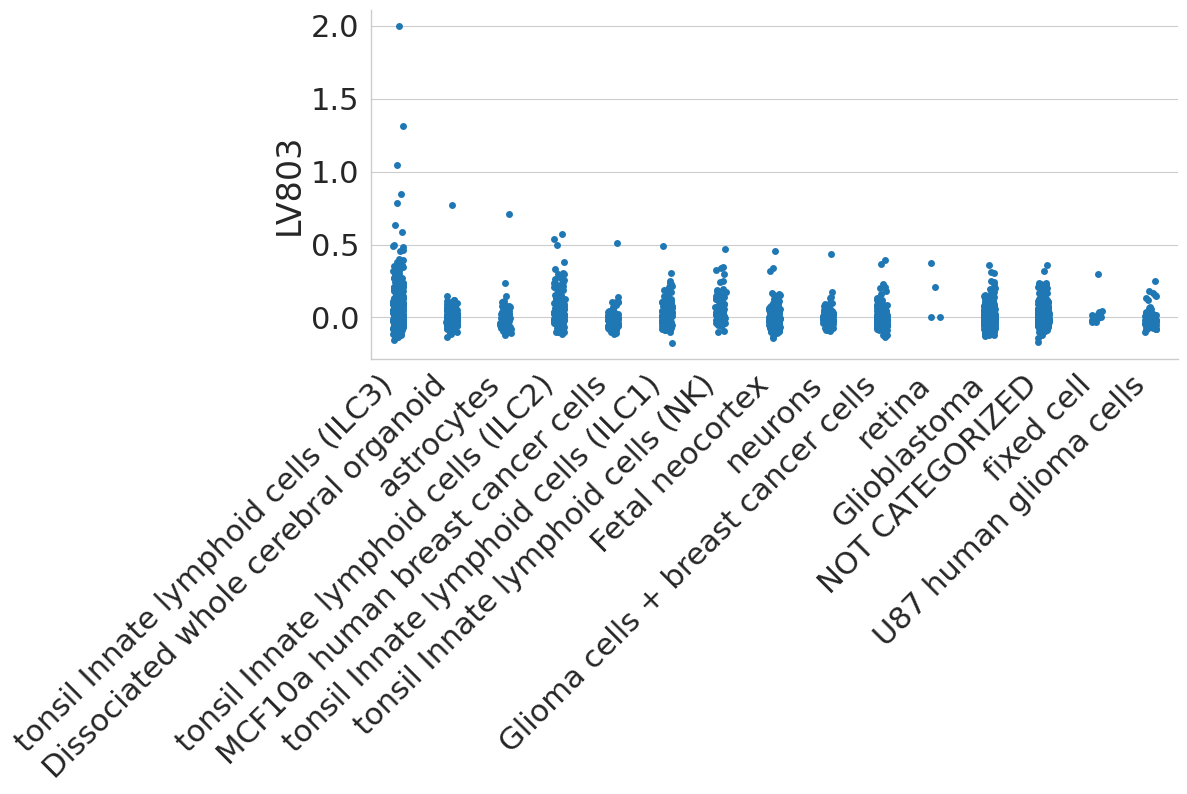

In [71]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [43]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [44]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("NOT CAT")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

cell type     LV844
project   run                                  
SRP064464 SRR2558125  NOT CATEGORIZED  0.963351
SRP059643 SRR2069999  NOT CATEGORIZED  0.930991
SRP050499 SRR2013751  NOT CATEGORIZED  0.866832
          SRR2013745  NOT CATEGORIZED  0.836880
SRP059643 SRR2070001  NOT CATEGORIZED  0.835545
          SRR2069998  NOT CATEGORIZED  0.822161
          SRR2069996  NOT CATEGORIZED  0.785900
          SRR2069997  NOT CATEGORIZED  0.747243
          SRR2070000  NOT CATEGORIZED  0.730205
SRP050499 SRR2013743  NOT CATEGORIZED  0.572243
SRP039397 SRR1182595  NOT CATEGORIZED  0.549734
SRP050499 SRR2013752  NOT CATEGORIZED  0.511177
SRP007412 SRR306844   NOT CATEGORIZED  0.496199
SRP039397 SRR1182593  NOT CATEGORIZED  0.469808
SRP043378 SRR1425073  NOT CATEGORIZED  0.378010
          SRR1425075  NOT CATEGORIZED  0.377215
          SRR1425076  NOT CATEGORIZED  0.373575
          SRR1425072  NOT CATEGORIZED  0.348790
SRP050499 SRR2013749  NOT CATEGORIZED  0.342042
SRP030628 SRR1004287  NOT CATEGORIZED  0.335289

In [46]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP059643"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

etoh/dox treatment       infected construct  \
project   run                                                      
SRP059643 SRR2069999               EtOH   pInducer21-MYC-Swap-HA   
          SRR2070001               EtOH     pInducer21-MYC-WT-HA   
          SRR2069998                Dox   pInducer21-MYC-Swap-HA   
          SRR2069996                Dox  pInducer21-MYC-Kless-HA   
          SRR2069997               EtOH  pInducer21-MYC-Kless-HA   
          SRR2070000                Dox     pInducer21-MYC-WT-HA   
          SRR2939553                NaN                      NaN   
          SRR2939549                NaN                      NaN   
          SRR2939555                NaN                      NaN   
          SRR2939546               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069983                Dox         pInducer21-empty   
          SRR2939544               EtOH   pInducer21-MYC-K52o-HA   
          SRR2939548                Dox     pInducer21-MYC-WT-HA   
          SRR2939554                NaN                      NaN   
          SRR2939545                Dox  pInducer21-MYC-Kless-HA   
          SRR2939550                NaN                      NaN   
          SRR2939552                NaN                      NaN   
          SRR2069978                Dox         pInducer21-empty   
          SRR2069981                Dox  pInducer21-MYC-Kless-HA   
          SRR2939539               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069993               EtOH   pInducer21-MYC-Swap-HA   
          SRR2069991               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069990                Dox  pInducer21-MYC-Kless-HA   
          SRR2069985               EtOH     pInducer21-MYC-WT-HA   
          SRR2069977               EtOH  pInducer21-MYC-Kless-HA   
          SRR2939535                Dox  pInducer21-MYC-Kless-HA   
          SRR2939538                Dox     pInducer21-MYC-WT-HA   
          SRR2069982               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069987               EtOH     pInducer21-MYC-WT-HA   
          SRR2939551                NaN                      NaN   
          SRR2069976                Dox  pInducer21-MYC-Kless-HA   
          SRR2939536               EtOH  pInducer21-MYC-Kless-HA   
          SRR2069980               EtOH     pInducer21-MYC-WT-HA   
          SRR2069995               EtOH     pInducer21-MYC-WT-HA   
          SRR2939543                Dox   pInducer21-MYC-K52o-HA   
          SRR2069989               EtOH     pInducer21-MYC-WT-HA   
          SRR2939540                Dox  pInducer21-MYC-Kless-HA   
          SRR2939542                Dox     pInducer21-MYC-WT-HA   
          SRR2939547               EtOH     pInducer21-MYC-WT-HA   
          SRR2069994                Dox     pInducer21-MYC-WT-HA   
          SRR2069988                Dox     pInducer21-MYC-WT-HA   
          SRR2069986                Dox     pInducer21-MYC-WT-HA   
          SRR2069984                Dox     pInducer21-MYC-WT-HA   
          SRR2939537                Dox     pInducer21-MYC-WT-HA   
          SRR2069992                Dox   pInducer21-MYC-Swap-HA   
          SRR2069979                Dox     pInducer21-MYC-WT-HA   
          SRR2939541               EtOH     pInducer21-MYC-WT-HA   

                     mg/etoh treatment replicates    sirna     LV844  
project   run                                                         
SRP059643 SRR2069999              EtOH          1      NaN  0.930991  
          SRR2070001              EtOH          1      NaN  0.835545  
          SRR2069998              EtOH          1      NaN  0.822161  
          SRR2069996              EtOH          1      NaN  0.785900  
          SRR2069997              EtOH          1      NaN  0.747243  
          SRR2070000              EtOH          1      NaN  0.730205  
          SRR2939553               NaN          2  siCDC73 -0.002303  
          SRR2939549               NaN          1

In [106]:
_tmp.iloc[0]["sample type"]

'undifferentiated Epstein-Barr virus (EBV)-positive NPC xenograft'

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )